In [2]:
import numpy as np                      # linear algebra
import pandas as pd                     # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns                    #for Plotting
import pandas_profiling
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
local_path = "C:/Users/Aravind/Desktop/UpX Academy/Data Science Track - 01/PROJECTS TO BE DOING/Project Datasets/Project_1_NYC-Flight_data/flight_data.csv"
input_data = pd.read_csv(local_path)                           #load CSV file from local directory
input_data.head()                                         # Preview the first 5 lines of the loaded data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [5]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [6]:
pandas_profiling.ProfileReport(input_data)

Number of variables,19
Number of observations,336776
Total Missing (%),0.6%
Total size in memory,48.8 MiB
Average record size in memory,152.0 B
Numeric,9
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [7]:
df_flight = pd.DataFrame(input_data)          
#display(data)
df_flight.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [8]:
# Drop highly correlated cols to get more correct result 
df_flight.drop(['sched_dep_time','year','hour'], axis=1, inplace=True)

In [9]:
df_flight.describe()

,month,day,dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,minute
count,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000
mean,6.548510,15.710787,1349.109947,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,26.230100
std,3.414457,8.768607,488.281791,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,19.300846
min,1.000000,1.000000,1.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,0.000000
25%,4.000000,8.000000,907.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,8.000000
50%,7.000000,16.000000,1401.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,29.000000
75%,10.000000,23.000000,1744.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,44.000000
max,12.000000,31.000000,2400.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,59.000000


# fill null values

In [10]:
cols = ['dep_delay','arr_time','sched_arr_time','tailnum']
df_flight[cols] = df_flight[cols].fillna(df_flight.mode().iloc[0])

In [11]:
df_flight['air_time'] = df_flight['air_time'].fillna(df_flight['air_time'].median())
df_flight['dep_time'] = df_flight['dep_time'].fillna(df_flight['dep_time'].median())

In [12]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 16 columns):
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
dep_delay         336776 non-null float64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           336776 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(6), object(5)
memory usage: 41.1+ MB


In [13]:
df_flight.head()

,month,day,dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,minute,time_hour
0,1,1,517.0,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,15,01-01-2013 05:00
1,1,1,533.0,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,29,01-01-2013 05:00
2,1,1,542.0,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,40,01-01-2013 05:00
3,1,1,544.0,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,45,01-01-2013 05:00
4,1,1,554.0,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,0,01-01-2013 06:00


In [14]:
# Create dataset of only numeric values
flight_numeric_data = df_flight[['month', 'day', 'dep_time','dep_delay',
       'arr_time', 'sched_arr_time', 'flight','air_time','minute']]

In [15]:
# Create dataset of only categorical values
flight_categorical_data = df_flight[['carrier', 'tailnum', 'origin','dest','time_hour']]

Text(0.5,0,'arr_time')

Text(0,0.5,'Flight')

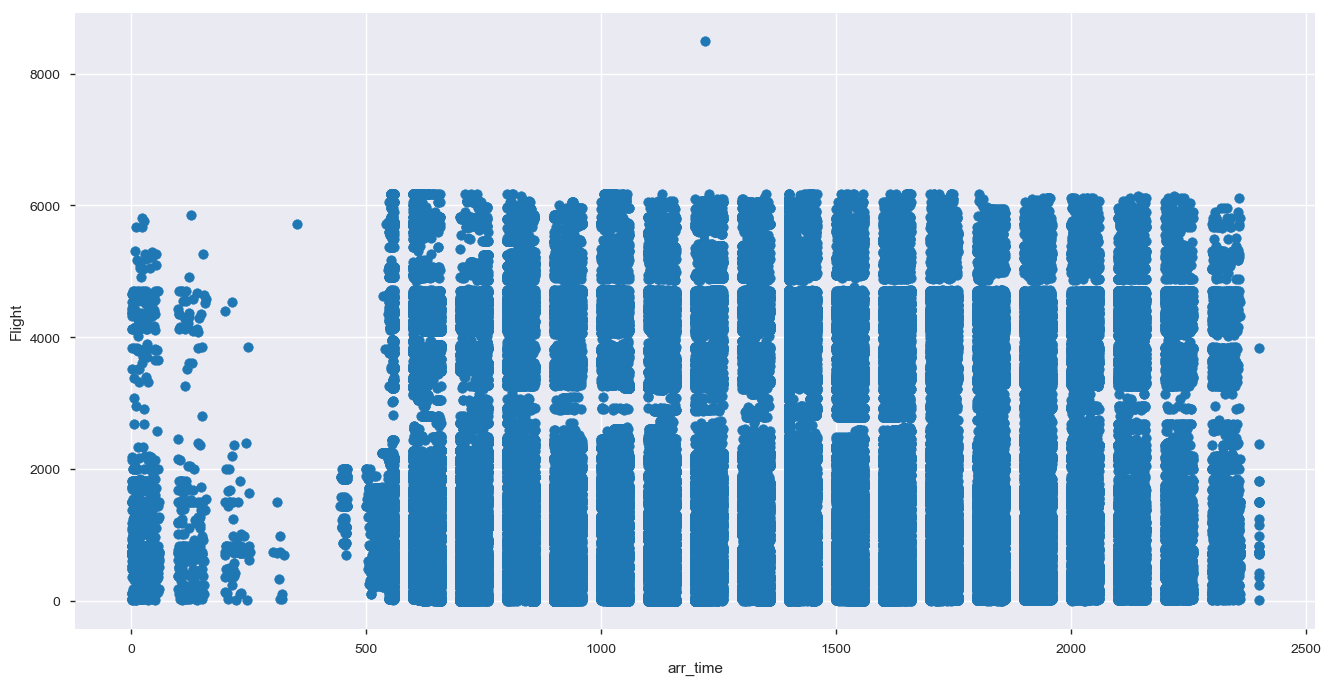

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_flight['dep_time'], df_flight['flight'])
ax.set_xlabel('arr_time')
ax.set_ylabel('Flight')
plt.show()

# Outlier treatment

In [17]:
np.round(flight_numeric_data.quantile(np.arange(0,1.05,0.05)),2) 
# floring and coupling (1 % to 99 %) approach for Outlier treatment 

,month,day,dep_time,dep_delay,arr_time,sched_arr_time,flight,air_time,minute
0.00,1.0,1.0,1.0,-43.0,1.0,1.0,1.0,20.0,0.0
0.05,1.0,2.0,625.0,-9.0,739.0,815.0,91.0,40.0,0.0
0.10,2.0,4.0,706.0,-7.0,856.0,917.0,209.0,47.0,0.0
0.15,2.0,5.0,756.0,-6.0,948.0,1007.0,329.0,57.0,0.0
0.20,3.0,7.0,831.0,-6.0,1008.0,1040.0,421.0,73.0,5.0
0.25,4.0,8.0,915.0,-5.0,1047.0,1124.0,553.0,84.0,8.0
0.30,4.0,10.0,1011.0,-5.0,1135.0,1214.0,706.0,96.0,11.0
0.35,5.0,11.0,1115.0,-4.0,1224.0,1305.0,901.0,106.0,15.0
0.40,5.0,13.0,1214.0,-3.0,1320.0,1400.0,1115.0,113.0,20.0
0.45,6.0,14.0,1317.0,-2.0,1418.0,1455.0,1262.0,122.0,25.0


In [18]:
for x in flight_numeric_data.columns:
    percentiles = flight_numeric_data[x].quantile([0.01,0.99]).values
    flight_numeric_data[x][flight_numeric_data[x] <= percentiles[0]] = percentiles[0]
    flight_numeric_data[x][flight_numeric_data[x] >= percentiles[1]] = percentiles[1]

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

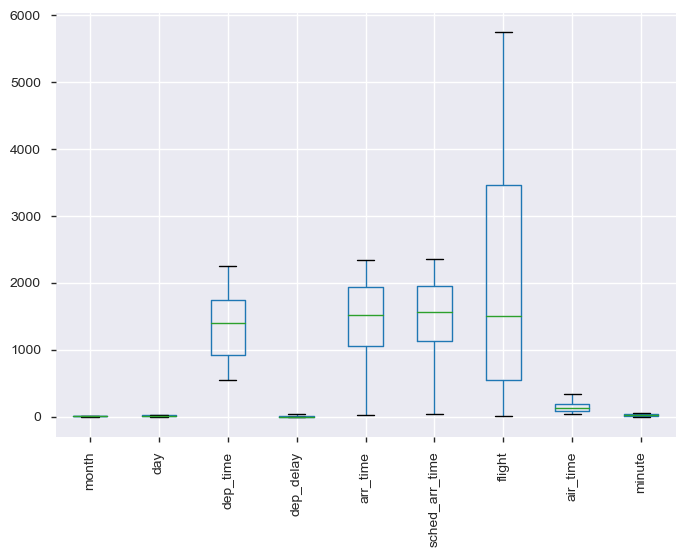

In [19]:
flight_numeric_data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [20]:
# Z Score based approach for Outlier treatment 
from scipy import stats
zscore = np.abs(stats.zscore(flight_numeric_data))
zscore
zscore_df = pd.DataFrame(zscore)
zscore_df.head()

array([[1.62500738, 1.67766769, 1.67853924, ..., 0.26121757, 0.85887789,
        0.58184581],
       [1.62500738, 1.67766769, 1.67853924, ..., 0.15745581, 0.85887789,
        0.14351208],
       [1.62500738, 1.67766769, 1.67853924, ..., 0.50926345, 0.11635574,
        0.71343614],
       ...,
       [0.71797462, 1.62958997, 0.10350321, ..., 0.9151584 , 0.22719929,
        0.8409022 ],
       [0.71797462, 1.62958997, 0.10350321, ..., 0.98330961, 0.22719929,
        1.69785043],
       [0.71797462, 1.62958997, 0.10350321, ..., 0.95813664, 0.22719929,
        0.71343614]])

,0,1,2,3,4,5,6,7,8
0,1.625007,1.677668,1.678539,0.273344,1.240058,1.444720,0.261218,0.858878,0.581846
1,1.625007,1.677668,1.678539,0.216040,1.202440,1.422574,0.157456,0.858878,0.143512
2,1.625007,1.677668,1.678539,0.273344,1.065134,1.382307,0.509263,0.116356,0.713436
3,1.625007,1.677668,1.678539,0.359299,0.912781,1.036012,0.764677,0.371251,0.972493
4,1.625007,1.677668,1.672250,0.502559,1.273914,1.408480,0.926766,0.371271,1.359015


In [21]:
flight_numeric_data_cleaned = flight_numeric_data[(zscore<3).all(axis=1)]

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

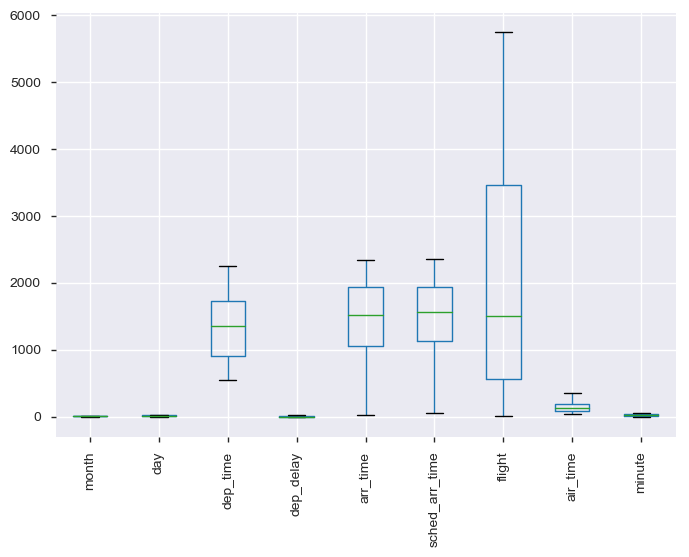

In [22]:
flight_numeric_data_cleaned.boxplot()
plt.xticks(rotation=90)
plt.show()

In [23]:
q1 = flight_numeric_data_cleaned.quantile(0.25)
q3 = flight_numeric_data_cleaned.quantile(0.75)
iqr = q3-q1
iqr
# iqr based approach for Outlier treatment 

month                6.0
day                 15.0
dep_time           814.0
dep_delay           12.0
arr_time           875.0
sched_arr_time     815.0
flight            2898.0
air_time           105.0
minute              36.0
dtype: float64

In [24]:
flight_numeric_cleaned_data = flight_numeric_data_cleaned [~((flight_numeric_data_cleaned<(q1-1.5*iqr))|(flight_numeric_data_cleaned>(q3+1.5*iqr))).any(axis=1)]
flight_numeric_cleaned_data.describe()

,month,day,dep_time,dep_delay,arr_time,sched_arr_time,flight,air_time,minute
count,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000
mean,6.571493,15.698898,1281.904318,-0.924206,1468.887074,1508.921873,1979.907984,143.554912,25.940580
std,3.413575,8.800662,455.067812,7.501509,475.385846,469.054677,1607.160218,83.343488,19.409347
min,1.000000,1.000000,551.000000,-12.000000,22.000000,47.000000,11.000000,33.000000,0.000000
25%,4.000000,8.000000,848.000000,-5.000000,1036.000000,1109.000000,601.000000,83.000000,6.000000
50%,7.000000,16.000000,1313.000000,-3.000000,1438.000000,1510.000000,1529.000000,129.000000,29.000000
75%,10.000000,23.000000,1646.000000,1.000000,1855.000000,1914.000000,3433.000000,177.000000,44.000000
max,12.000000,31.000000,2250.000000,25.000000,2344.000000,2353.000000,5736.000000,346.000000,59.000000


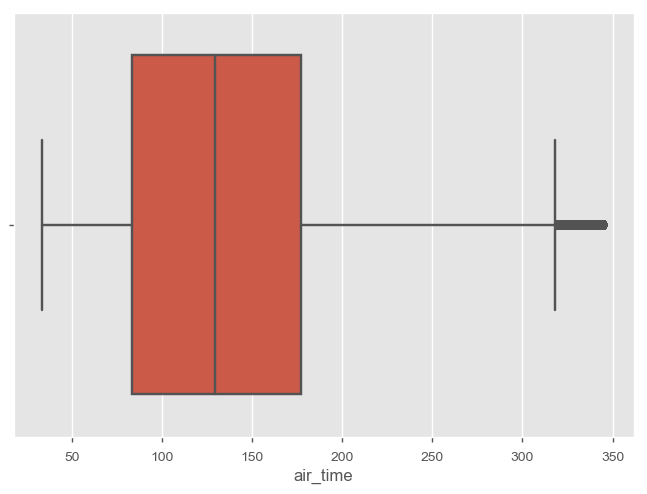

In [25]:
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='air_time',data=flight_numeric_cleaned_data)

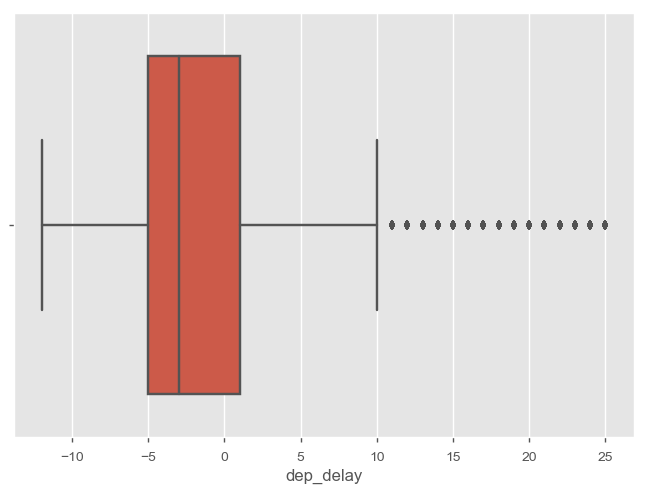

In [26]:
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='dep_delay',data=flight_numeric_cleaned_data)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

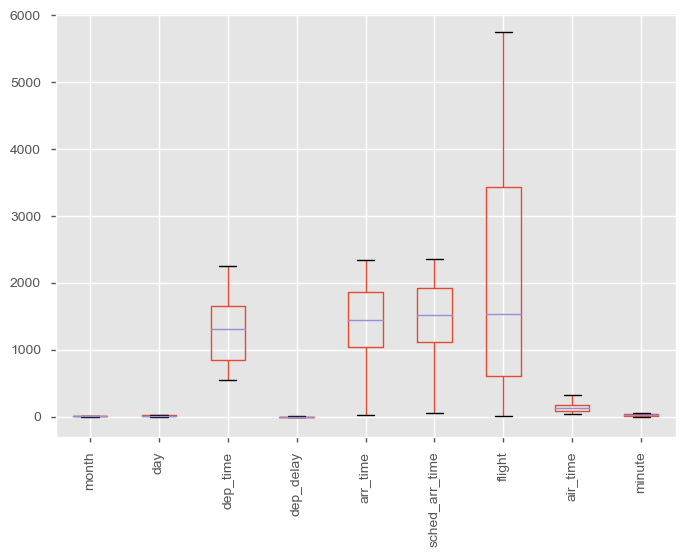

In [27]:
flight_numeric_cleaned_data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [28]:
flight_numeric_cleaned_data.describe()
flight_numeric_cleaned_data.info()
flight_categorical_data.info()

,month,day,dep_time,dep_delay,arr_time,sched_arr_time,flight,air_time,minute
count,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000,270061.000000
mean,6.571493,15.698898,1281.904318,-0.924206,1468.887074,1508.921873,1979.907984,143.554912,25.940580
std,3.413575,8.800662,455.067812,7.501509,475.385846,469.054677,1607.160218,83.343488,19.409347
min,1.000000,1.000000,551.000000,-12.000000,22.000000,47.000000,11.000000,33.000000,0.000000
25%,4.000000,8.000000,848.000000,-5.000000,1036.000000,1109.000000,601.000000,83.000000,6.000000
50%,7.000000,16.000000,1313.000000,-3.000000,1438.000000,1510.000000,1529.000000,129.000000,29.000000
75%,10.000000,23.000000,1646.000000,1.000000,1855.000000,1914.000000,3433.000000,177.000000,44.000000
max,12.000000,31.000000,2250.000000,25.000000,2344.000000,2353.000000,5736.000000,346.000000,59.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 270061 entries, 0 to 336775
Data columns (total 9 columns):
month             270061 non-null int64
day               270061 non-null int64
dep_time          270061 non-null float64
dep_delay         270061 non-null float64
arr_time          270061 non-null float64
sched_arr_time    270061 non-null int64
flight            270061 non-null int64
air_time          270061 non-null float64
minute            270061 non-null int64
dtypes: float64(4), int64(5)
memory usage: 20.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 5 columns):
carrier      336776 non-null object
tailnum      336776 non-null object
origin       336776 non-null object
dest         336776 non-null object
time_hour    336776 non-null object
dtypes: object(5)
memory usage: 12.8+ MB


In [29]:
import numpy as np

def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    outlier_indices = collections.Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(flight_numeric_cleaned_data,2,["dep_time","dep_delay","flight","air_time"])

In [30]:
Outliers_to_drop

[]

In [31]:
flight_dataset = flight_numeric_cleaned_data.append(flight_categorical_data)
flight_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606837 entries, 0 to 336775
Data columns (total 14 columns):
air_time          270061 non-null float64
arr_time          270061 non-null float64
carrier           336776 non-null object
day               270061 non-null float64
dep_delay         270061 non-null float64
dep_time          270061 non-null float64
dest              336776 non-null object
flight            270061 non-null float64
minute            270061 non-null float64
month             270061 non-null float64
origin            336776 non-null object
sched_arr_time    270061 non-null float64
tailnum           336776 non-null object
time_hour         336776 non-null object
dtypes: float64(9), object(5)
memory usage: 69.4+ MB


## Q1 - In Which Month flights are more demanding? (Peak time of flight)

In [ ]:
sns.distplot(flight_dataset['month'], bins=25, kde=False)
plt.ylabel('flight')
plt.show();
# ANS- OCT month  

## Q2_0 - Which Airline maximum Departure delays.

In [43]:
group_1 = df_flight['dep_delay'].groupby(df_flight['carrier'])
group_2 = group_1.agg('count')
max_dep_del_total = group_2.sort_values(ascending=False)
max_dep_del_total 

# ANS - Carrier UA has the maximum departure delays in total of 58,665 times in a year.

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: dep_delay, dtype: int64

Text(0,0.5,'No. of times')

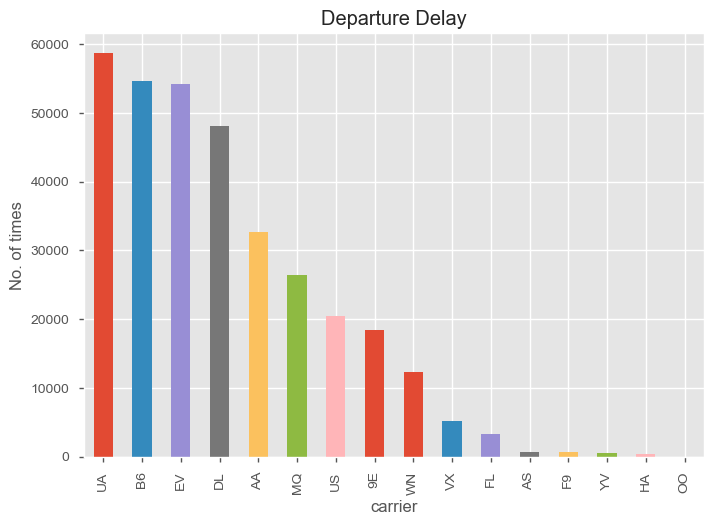

In [34]:
max_dep_del_total.plot(kind ='bar', title = 'Departure Delay')
plt.ylabel('No. of times')
plt.show()

In [35]:
group_2 = group_1.agg('sum')
max_dep_del_total = group_2.sort_values(ascending=False)
max_dep_del_total 

# ANS - Carrier EV has the maximum departure delays in total of 1,010,744 minutes in a year.

carrier
EV    1010744.0
B6     703087.0
UA     698468.0
DL     440737.0
9E     286076.0
AA     272371.0
MQ     259351.0
WN     213051.0
US      71853.0
VX      65878.0
FL      59315.0
F9      13772.0
YV      10073.0
AS       4123.0
HA       1676.0
OO        350.0
Name: dep_delay, dtype: float64

Text(0,0.5,'Delay in Average min')

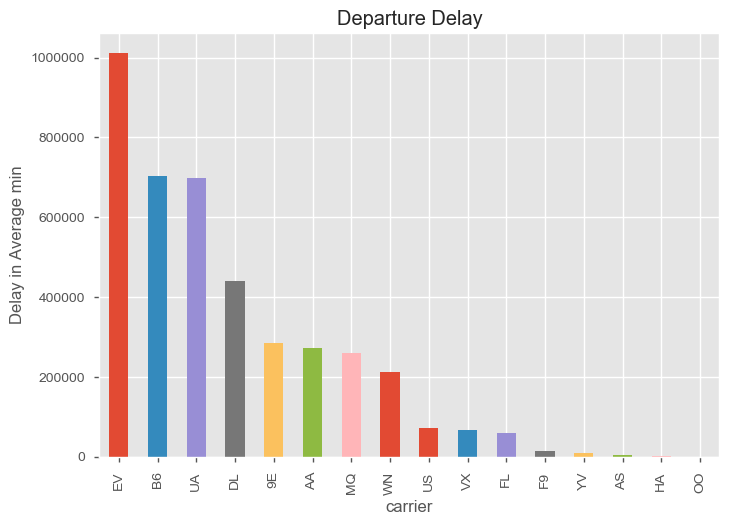

In [36]:
max_dep_del_total.plot(kind ='bar', title = 'Departure Delay')
plt.ylabel('Delay in Average min')
plt.show()

## Q2_1 - Which Month has  maximum Departure delays.

In [44]:
group_1 = df_flight['dep_delay'].groupby(df_flight['month'])
group_2 = group_1.agg('count')
max_dep_del_total = group_2.sort_values(ascending=False)
max_dep_del_total 

# ANS - Month July has the maximum departure delays in total of 29,425 times.

month
7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: dep_delay, dtype: int64

Text(0,0.5,'Delay in No. of times')

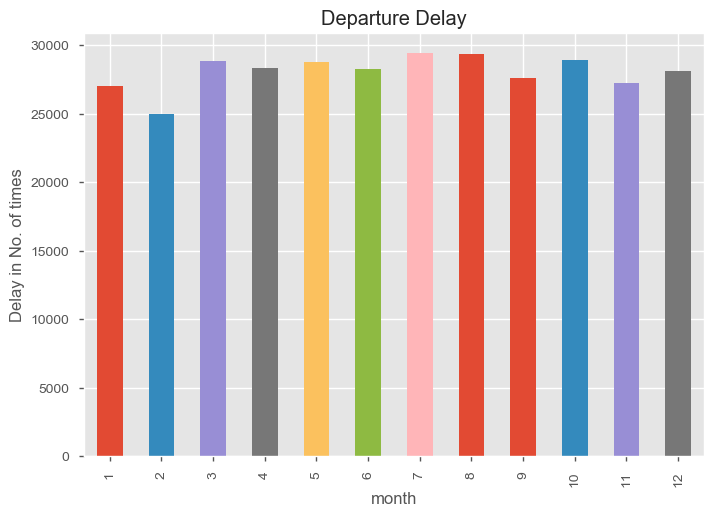

In [45]:
group_2.plot(kind ='bar', title = 'Departure Delay')
plt.ylabel('Delay in No. of times')
plt.show()

In [46]:
group_1 = df_flight['dep_delay'].groupby(df_flight['month'])
group_2 = group_1.sum()
max_dep_del_total = group_2.sort_values(ascending=False)
max_dep_del_total 

# ANS - Month July has the maximum departure delays in total of 614,216 minutes.

month
7     614216.0
6     562684.0
12    444269.0
4     382214.0
3     365696.0
5     363843.0
8     361285.0
1     263196.0
2     249946.0
9     180067.0
10    177729.0
11    145780.0
Name: dep_delay, dtype: float64

Text(0,0.5,'Delay in Total min')

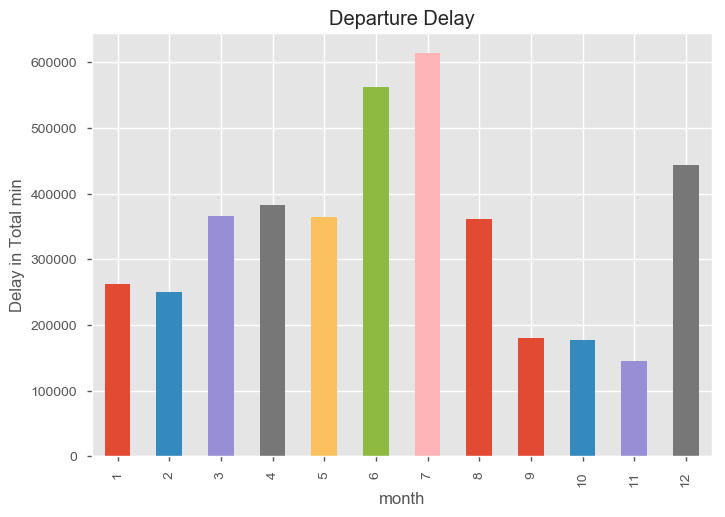

In [47]:
group_2.plot(kind ='bar', title = 'Departure Delay')
plt.ylabel('Delay in Total min')
plt.show()

## Q2_2. Which flight is having maximum departure delay?


In [48]:
max_dep_delay = df_flight.iloc[:,3].max()
flight_delay = df_flight[df_flight['dep_delay'] == max_dep_delay]
print (flight_delay[['dep_delay','flight', 'carrier']])

      dep_delay  flight carrier
7072     1301.0      51      HA


## Q3 - Best airports in terms of time departure %

In [49]:
df_flight["Dep_Status"] = ""

In [50]:
df_flight.loc[df_flight.dep_delay < 0, "Dep_Status"] = "Early"
df_flight.loc[df_flight.dep_delay == 0, "Dep_Status"] = "On_Time"
df_flight.loc[df_flight.dep_delay > 0, "Dep_Status"] = "Delayed"

In [52]:
flight_dep = df_flight.groupby(["origin","Dep_Status"])["Dep_Status"].agg("count").unstack("Dep_Status")
flight_dep['Total'] = flight_dep['Delayed'] + flight_dep['Early'] + flight_dep['On_Time']     
flight_dep

Dep_Status,Delayed,Early,On_Time,Total
origin,,,,
EWR,52711,62539,5585,120835
JFK,42031,63009,6239,111279
LGA,33690,66282,4690,104662


In [53]:
flight_dep["Delayed%"] = (flight_dep.iloc[:,0]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep["On_Time%"] = (flight_dep.iloc[:,2]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep["Early%"] = (flight_dep.iloc[:,1]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep

Dep_Status,Delayed,Early,On_Time,Total,Delayed%,On_Time%,Early%
origin,,,,,,,
EWR,52711,62539,5585,120835,43.62,4.62,51.76
JFK,42031,63009,6239,111279,37.77,5.61,56.62
LGA,33690,66282,4690,104662,32.19,4.48,63.33


Text(0,0.5,'%')

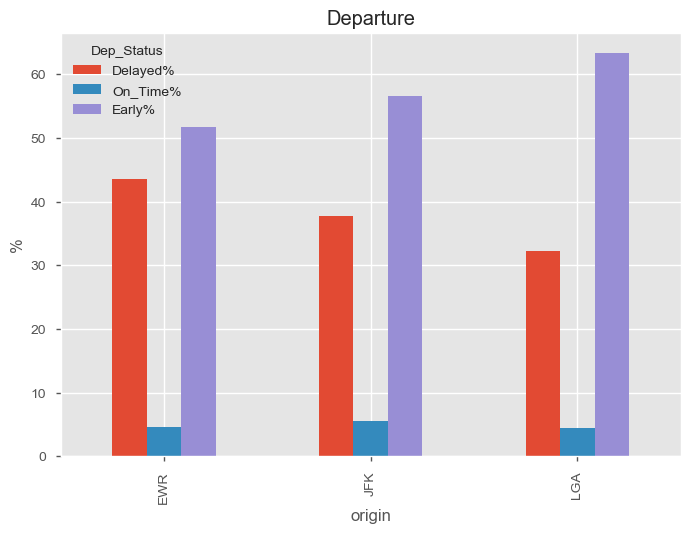

In [54]:
flight_dep[["Delayed%","On_Time%","Early%"]].plot(kind ="bar", title = "Departure")
plt.ylabel("%")
plt.show()

In [ ]:
# ANS = 

## Q4 - Aircraft speed analysis. 

In [55]:
df_flight['air_time'] = df_flight['air_time'].astype(int)
df_flight['flight']= df_flight['flight'].astype(str)
df_flight.dtypes
# Converting air_time into int dType

month               int64
day                 int64
dep_time          float64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight             object
tailnum            object
origin             object
dest               object
air_time            int32
distance            int64
minute              int64
time_hour          object
Dep_Status         object
dtype: object

In [ ]:
df_flight['carrier_flight'] = df_flight['carrier'] + "_"+ df_flight['flight']

In [ ]:
flight_speed_1 = df_flight[['carrier_flight','carrier','air_time','distance']]
speed = flight_speed_1.groupby('carrier_flight').sum()
speed['speed_Mph'] = round(speed.apply(lambda row: (row.distance / row.air_time)*60, axis = 1),2)
speed.sort_values(by = ['speed_Mph'], ascending = False).head(10)
# ANS - Carrier Flights WN_1903 & UA_1173 both are top speed flight 

## Q5 - On time arrival % analysis.

In [56]:
df_flight["Arr_Status"] = ""

In [57]:
df_flight.loc[df_flight.arr_delay < 0, "Arr_Status"] = "Early"
df_flight.loc[df_flight.arr_delay == 0, "Arr_Status"] = "On_Time"
df_flight.loc[df_flight.arr_delay > 0, "Arr_Status"] = "Delayed"

In [64]:
flight_dep = df_flight.groupby(["dest","Arr_Status"])["Arr_Status"].agg("count").unstack("Arr_Status")
flight_dep["Total"] = flight_dep["Delayed"] + flight_dep["Early"] + flight_dep["On_Time"]     
flight_dep

Arr_Status,,Delayed,Early,On_Time,Total
dest,,,,,
ABQ,NaN,107.0,145.0,2.0,254.0
ACK,1.0,104.0,155.0,5.0,264.0
ALB,21.0,184.0,229.0,5.0,418.0
ANC,NaN,5.0,3.0,NaN,NaN
ATL,378.0,7946.0,8541.0,350.0,16837.0
AUS,28.0,983.0,1401.0,27.0,2411.0
AVL,14.0,119.0,134.0,8.0,261.0
BDL,31.0,144.0,264.0,4.0,412.0
BGR,17.0,137.0,216.0,5.0,358.0


In [65]:
flight_dep["Delayed%"] = (flight_dep.iloc[:,0]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep["On_Time%"] = (flight_dep.iloc[:,2]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep["Early%"] = (flight_dep.iloc[:,1]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep

Arr_Status,,Delayed,Early,On_Time,Total,Delayed%,On_Time%,Early%
dest,,,,,,,,
ABQ,NaN,107.0,145.0,2.0,254.0,NaN,7250.00,5350.00
ACK,1.0,104.0,155.0,5.0,264.0,20.00,3100.00,2080.00
ALB,21.0,184.0,229.0,5.0,418.0,420.00,4580.00,3680.00
ANC,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN
ATL,378.0,7946.0,8541.0,350.0,16837.0,108.00,2440.29,2270.29
AUS,28.0,983.0,1401.0,27.0,2411.0,103.70,5188.89,3640.74
AVL,14.0,119.0,134.0,8.0,261.0,175.00,1675.00,1487.50
BDL,31.0,144.0,264.0,4.0,412.0,775.00,6600.00,3600.00
BGR,17.0,137.0,216.0,5.0,358.0,340.00,4320.00,2740.00


## Q6 - Maximum number of flights headed to some particular destination

In [66]:
df_flight.groupby('dest')['dest'].count().sort_values(ascending = False).head(5)

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64

## Q7 - Shortest path between airports. 

In [67]:
df_flight['path'] = df_flight['origin'] + '_'+ df_flight['dest']

In [68]:
sh_path_1 = df_flight['distance'].groupby(df_flight['path']).sum()
sh_path_2 = sh_path_1.sort_values(ascending = True)
sh_path_2.head(10)
# ANS - Shortest path between airports is EWR and LGA.

path
EWR_LGA      17
LGA_LEX     604
JFK_BHM     865
JFK_STL     892
JFK_MEM     964
LGA_MYR    1689
EWR_SBN    2548
LGA_BWI    2775
JFK_JAC    3788
LGA_SBN    3906
Name: distance, dtype: int64